In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


1. Данные по диагностике диабета содержат информаю по 8 характеристикам, всего 2000 записей. Пропусков в данных нет.
2. 2 характеристики (переменные): BMI и DiabetesPedigreeFunction имеют числовое значение (непрерывное числовое значение), тип float64
3. 6 характеристик + таргетная переменная - категориальные, имеют целочисленное значение.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


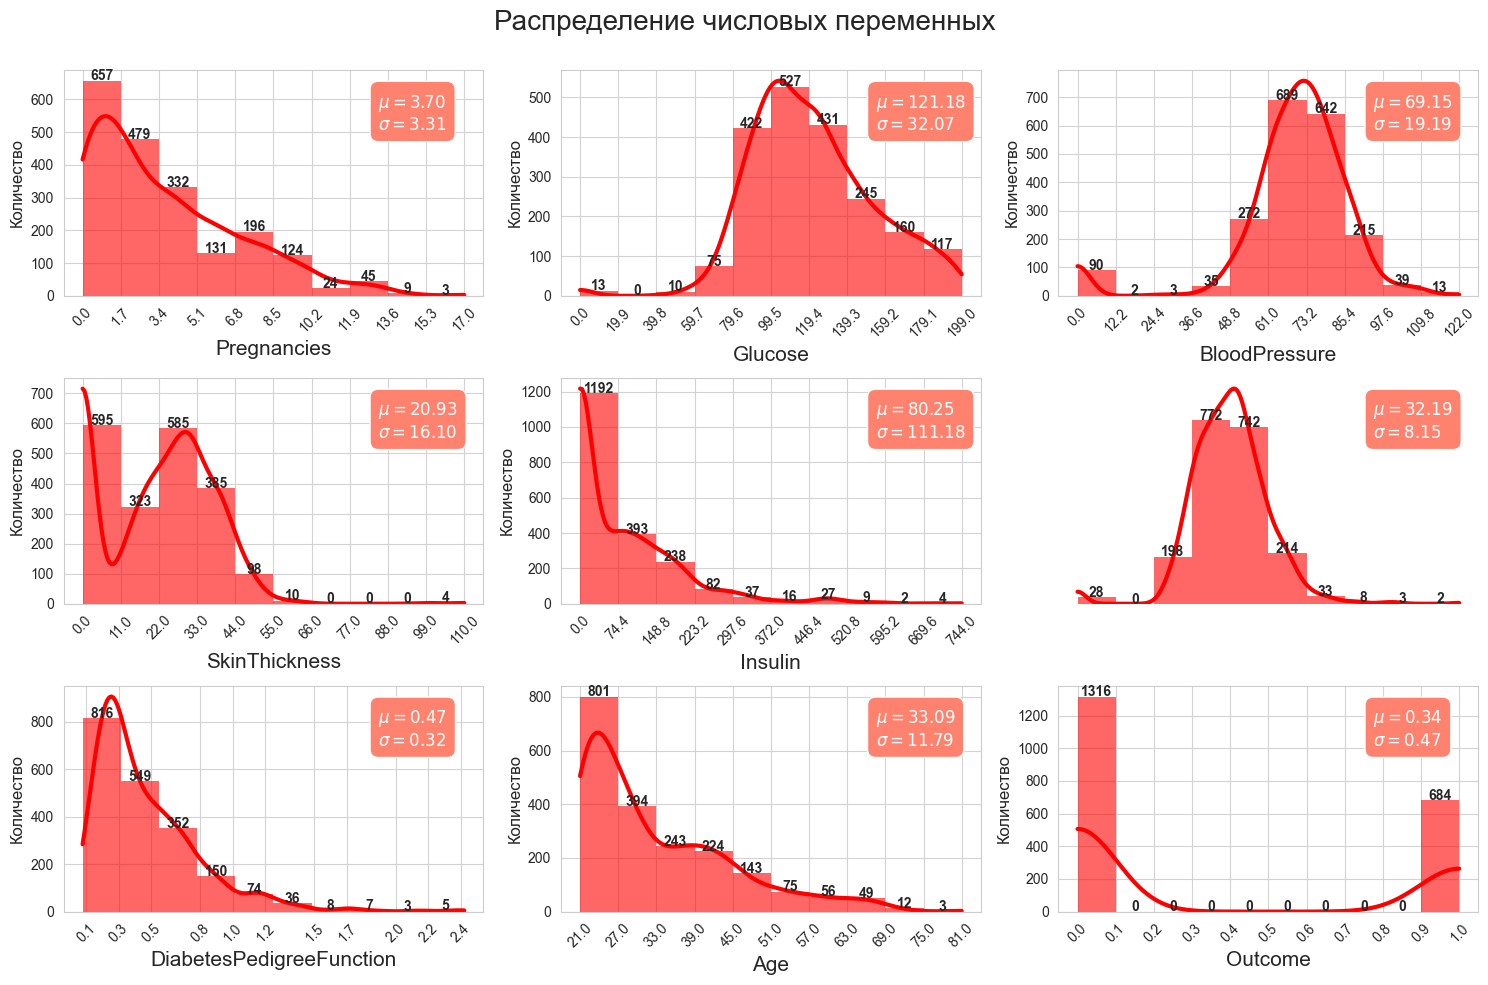

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**На основе представленных статистических данных и построенных гистограмм можно сделать следующие выводы о данных:**

1. Количество беременностей (Pregnancies): Средняя величина кол-во беременностей составляет около 3,7, с минимальным значением 0 и максимальным 17. Половина записей находится в диапазоне от 1 до 6. По графику распределение признака близко к логнормальному.
2. Глюкоза (Glucose): Среднее значение глюкозы в крови составляет около 121.18, с минимальным значением 0 и максимальным 118. Половина записей имеет значение глюкозы от 99 до 141. По графику распределение признака близко к нормальному, но с более длинным правым хвостом. **Так как 0 значение глюкозы невозможно, следует рассматривать 0 значения глюкозы в крови, как пропуски в данных.**
3. Кровяное давление (BloodPressure): Средний уровень давления составляет около 69.15, с минимальным значением 0 и максимальным 122. Половина записей имеет уровень давления от 63.5 до 80. По графику распределение признака близко к нормальному. **Так как 0 значение давления невозможно, следует рассматривать 0 значения давления крови, как пропуски в данных.**
4. Толщина кожи (SkinThickness): Среднее значения толщины кожи составляет около 20.93, с минимальным значением 0 и максимальным 110. Половина данных находится в диапазоне между 0 и 32. По графику распределение признака близко к нормальному. **Так как толщина кожи человека может принимать значения от 0.1 мм, а датасет содержит целочисленные значения сложно оценить являются ли 0 значения пропусками или реальными значениями.**
5. Инсулин (Insulin): Средний уровень инсулина составляет около 80.25, с минимальным значением 0 и максимальным 744. Половина записей имеет значение хлоридов между 27.3 и 67.8. По графику распределение признака близко к логнормальному. 
6. Индекс массы тела (BMI): Средний уровень BMI составляет около 32.19, с минимальным значением 0 и максимальным 80.6. Половина записей имеет значение свободного диоксида серы в дипапазоне между 23 и 46. Вероятно существуют выбросы в данных (три самых высоких значения). По графику распределение признака близко к логнормальному. По графику распределение признака близко к нормальному. **Так как 0 значение массы тела невозможно, следует рассматривать 0 значения BMI, как пропуски в данных.**
7. Тип диабета (DiabetesPedigreeFunction): Средний уровень составляет около 0.47, с минимальным значением 0.078 и максимальным 2.42. Половина записей имеет значение в дипапазоне между 0.244 и 0.624. По графику распределение признака близко к логнормальному.
8. Возраст (Age): Средний возраст составляет около 33.09, с минимальным значением 21 и максимальным 81. Половина записей имеет значение возраста в дипапазоне между 24 и 40. По графику распределение признака близко к логнормальному.


### Проведем исследование 0 значений

In [7]:
cols = ['Glucose', 'BloodPressure', 'BMI']
for  col in cols:
    print(col, df[col].value_counts()[0])

Glucose 13
BloodPressure 90
BMI 28


*Таким образом, в данных 13 пропущенных значений Глюкозы, 90 пропущенных значений Давления, и 28 пропущенных значений массы тела. Так как максимальное кол-во строк с пропущенными значениями 131, что составляет около 6,6 %, а все это данные кажутся очень важными для постреония модели, удалим все строки, сожержащие эти данные.*

In [8]:
df_filtered = df.copy()
for col in cols:
    df_filtered = df_filtered[df_filtered[col] != 0]

In [9]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1888.0,3.742055,3.304971,0.000,1.000,3.00,6.000,17.00
Glucose,1888.0,122.163665,30.784603,44.000,99.000,117.00,142.000,199.00
BloodPressure,1888.0,72.423729,12.255992,24.000,64.000,72.00,80.000,122.00
SkinThickness,1888.0,21.689089,15.642409,0.000,0.000,24.00,33.000,99.00
Insulin,1888.0,84.621292,112.669770,0.000,0.000,50.00,135.000,744.00
BMI,1888.0,32.655508,7.196732,18.200,27.500,32.40,36.800,80.60
DiabetesPedigreeFunction,1888.0,0.472931,0.323601,0.078,0.245,0.38,0.624,2.42
Age,1888.0,33.217691,11.780350,21.000,24.000,29.00,40.250,81.00
Outcome,1888.0,0.338453,0.473309,0.000,0.000,0.00,1.000,1.00


*Было удалено 112 строк, содержащие пропущенные значения*

Рассмотрим распределение классов

<Axes: ylabel='Diabete'>

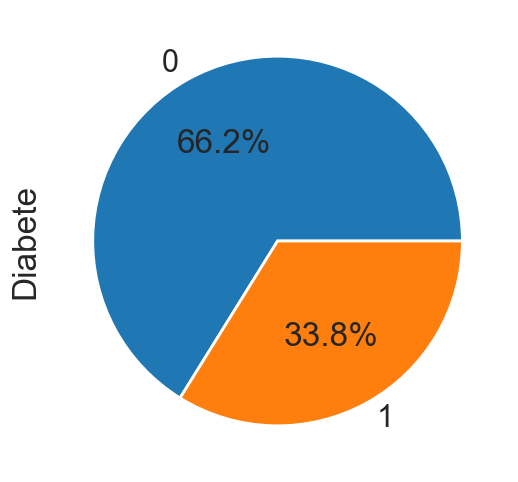

In [10]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df_filtered.groupby('Outcome').size().plot(kind='pie',
                                       y = "diabetes_outcome",
                                       label = "Diabete",
                                       autopct='%1.1f%%')

Таким образом, видим, что классы рапределены не равномерно, а именно 2 к 1. 66,2% данных содержат данные людей не больных диабетом и 33,8% данных с диагностированным диабетом.

Подготовим данные к построению модели, разобьем данные на обучающую и тестовые выборки, так же применим нормализацию данных для приведения данных к общему масштабу.

In [11]:
x = df_filtered.drop("Outcome",axis=1)
y = df_filtered["Outcome"]

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

Обучим модель логистической регрессии для прогнозирования диабета

In [14]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train_scale, y_train)

LogisticRegression()

Оценим качество модели используя метрики точности, полноты и f-меры

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lg.predict(x_test_scale)
print('accuracy', accuracy_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred, average='binary'))
print('recall', recall_score(y_test, y_pred, average='binary'))
print('f1', f1_score(y_test, y_pred, average='binary'))

accuracy 0.7724867724867724
precision 0.7070707070707071
recall 0.5511811023622047
f1 0.6194690265486725


Accuracy (0.77)- это метрика, которая характеризует качество модели, агрегированное по всем классам. Это полезно, когда классы для нас имеют одинаковое значение. В нашем случае класс больных диабетом имеет для нас большее значение. То есть для нас важнее выявить как можно больше больных диаьетом, даже если мы ошибочно поставим диагноз здоровому, чем пропустить больного.

Precision - точность (0.71), показывает, что из всех кого модель определила, как больных диаьетом, только 71% являются больными.
Recall - полнота (0.55), показывает, что модель определила только 55% больных диабетом, то есть достаточно много больных модель не смогла определить.
F1 мера, является гармоническим средним точности и полноты и является более точной метрикой для оценки модели бинарной классификации при несбалансированных по классам данных.